In [154]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

import misc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
#dataset_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"
dataset_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"

# Open-sky

In [156]:
survey = 'S1'
folder_path = f"{dataset_path}{survey}"
acq_list = [f"A{i:d}" for i in range(1, 11)]
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [157]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [158]:
# # Load ULISS RINEX files
# log_rinex = {}
# log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [159]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [160]:
# Load ULISS Matlab files
log_mat_cn0 = {}
log_mat_cn0 = misc.load_mat_cn0(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [161]:
# import scipy
# import numpy as np

# # (GPS: 1-32, GLO: 33-58, GAL : 59-94)

# columns = ['tow']
# columns += [f'G{i:02d}' for i in range(1,33)]
# columns += [f'R{i:02d}' for i in range(1,27)]
# columns += [f'E{i:02d}' for i in range(1,37)]

# filepath = f"{folder_path}/A7/UA/gnss.mat"
# mat = scipy.io.loadmat(filepath)

# df = pd.DataFrame()
# # L1 
# _df = np.concatenate((mat['GNSS']['time'][0][0], mat['GNSS']['snr_1'][0][0]), axis=1)
# _df = pd.DataFrame(_df, columns=columns)
# _df = _df.melt(id_vars=['tow'], var_name='prn', value_name='cn0').dropna()
# _df['frequency'] = 'L1'
# df = pd.concat([df, _df],  axis=0)
# df
# # L2/L5
# _df = np.concatenate((mat['GNSS']['time'][0][0], mat['GNSS']['snr_2'][0][0]), axis=1)
# _df = pd.DataFrame(_df, columns=columns)
# _df = _df.melt(id_vars=['tow'], var_name='prn', value_name='cn0').dropna()
# _df['frequency'] = 'L1'
# _df['frequency'].loc[_df["prn"].str.contains('G')] = 'L2'
# _df['frequency'].loc[_df["prn"].str.contains('R')] = 'L2'
# _df['frequency'].loc[_df["prn"].str.contains('E')] = 'L5'
# df = pd.concat([df, _df],  axis=0)
# df

## Texting

In [162]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['TEXTING'])

Text(0.5, 1.0, 'Open-sky (texting)')

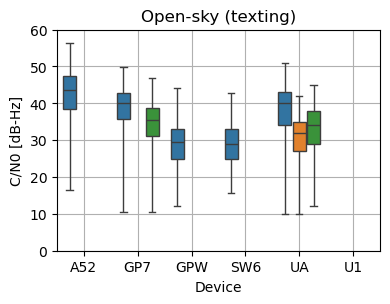

In [163]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (texting)")

## Swinging

In [164]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING'])

Text(0.5, 1.0, 'Open-sky (swinging)')

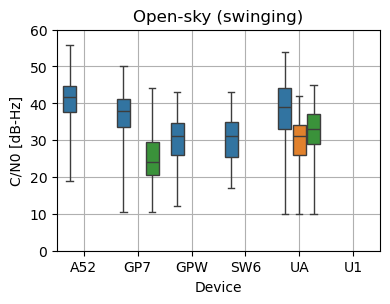

In [165]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (swinging)")

## Pocket

In [166]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['POCKET'])

Text(0.5, 1.0, 'Open-sky (pocket)')

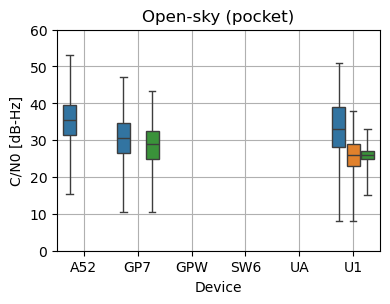

In [167]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Open-sky (pocket)")

## Comparing CN0 between modes

In [168]:
#log_dict = misc.selectMode([log_android, log_rinex], mode=['SWINGING', 'TEXTING', 'POCKET'])
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [169]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

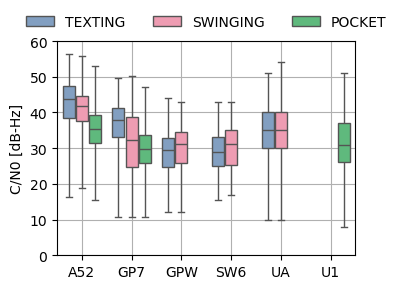

In [170]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)
#plt.title("Open-sky")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}.png', dpi=300)
# 

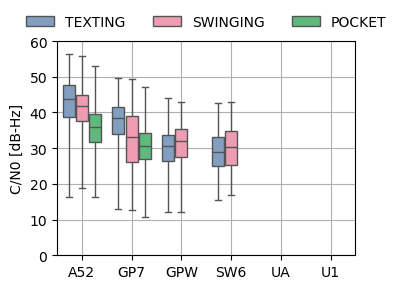

In [171]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
#plt.title("Open-sky (S1)")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}_filtered.png', dpi=300)

## Comparing signal tracked between mode

In [172]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

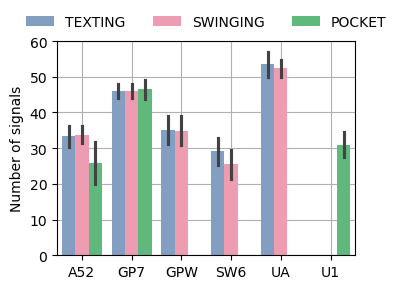

In [173]:
#misc.plotBoxPlotSignalsPerMode(log_dict, device_android, device_uliss)
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

#plt.title("Open-sky (all)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_all_{survey}.png', dpi=300)

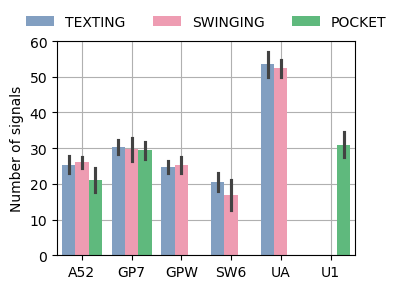

In [174]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    # Assuming values logged in ULISS have pseudorange valid bit flag, seems to be the case in all files checked
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        #log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

#plt.title("Open-sky (filtered by tracking state)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_track.png', dpi=300)

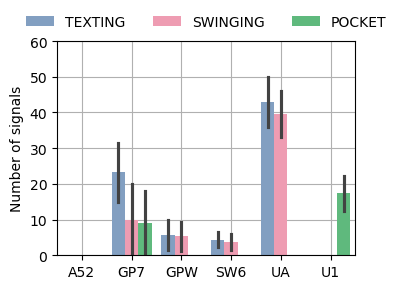

In [175]:
# Filter observations to keep only GPS, GALILEO, GLONASS phase valid
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellitesPhases(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

#plt.title("Open-sky (filtered by phase state)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_phase.png', dpi=300)

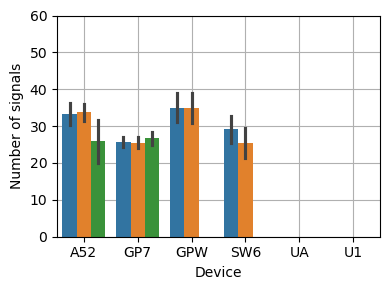

In [176]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

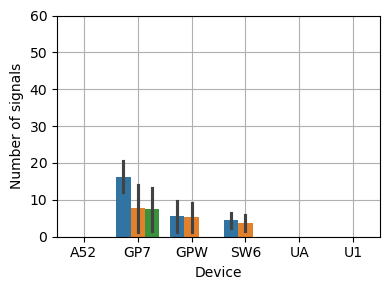

In [177]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Light indoor (train station)

In [178]:
survey = 'S3'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2', 'A3', 'A4']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [179]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey, 
                            indoor_only=True)

In [180]:
# # Load ULISS RINEX files
# log_rinex = {}
# log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
#                             indoor_only=True)

In [181]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
                        indoor_only=True)

In [182]:
# Load ULISS Matlab files
log_mat_cn0 = {}
log_mat_cn0 = misc.load_mat_cn0(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey,
                                indoor_only=True)

## Texting

In [183]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['TEXTING'])

Text(0.5, 1.0, 'Light indoor (texting)')

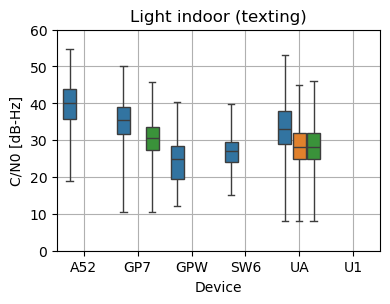

In [184]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (texting)")
 

## Swinging

In [185]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING'])

Text(0.5, 1.0, 'Light indoor (swinging)')

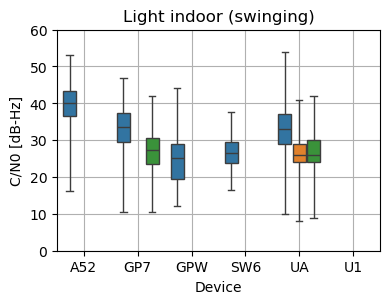

In [186]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (swinging)")
 

## Pocket

In [187]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['POCKET'])

Text(0.5, 1.0, 'Light indoor (pocket)')

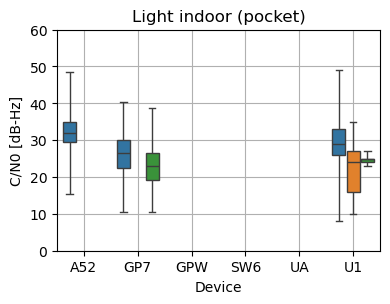

In [188]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Light indoor (pocket)")
 

## Comparing modes

In [189]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [190]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

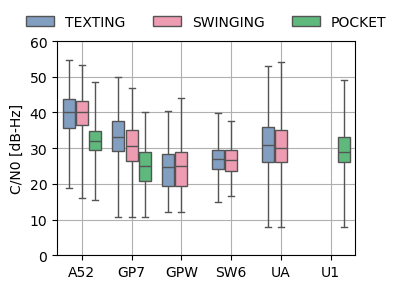

In [191]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss)

#plt.title("Light indoor")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}.png', dpi=300)

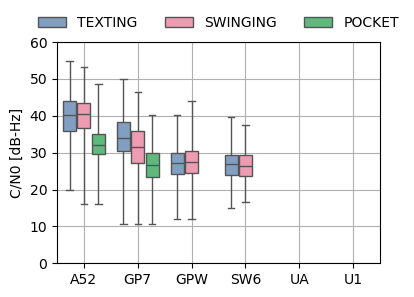

In [192]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)

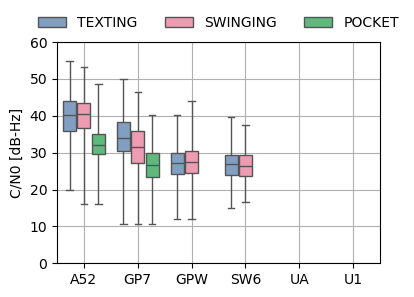

In [193]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
#plt.title("Open-sky")
 

## Comparing number of satellites

In [194]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

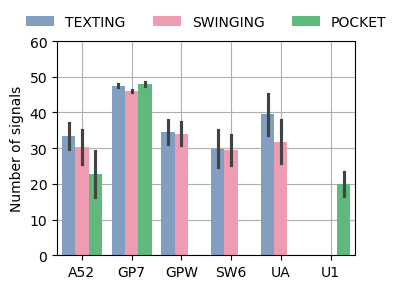

In [195]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss)

#plt.title("Light indoor (all)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_all_{survey}.png', dpi=300)

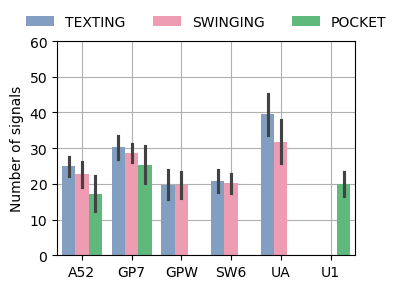

In [196]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    # Assuming values logged in ULISS have pseudorange valid bit flag, seems to be the case in all files checked
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        #log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

#plt.title("Open-sky (filtered by tracking state)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_track.png', dpi=300)

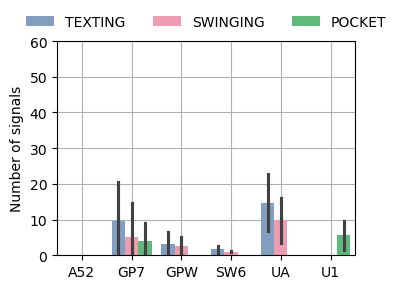

In [197]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellitesPhases(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss)

#plt.title("Light indoor (filtered)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_phase.png', dpi=300)

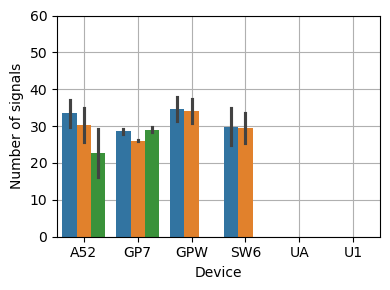

In [198]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

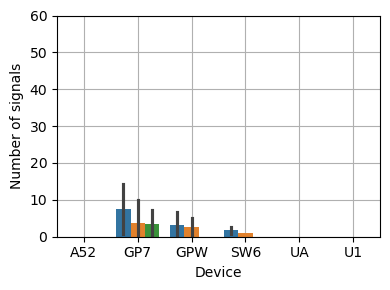

In [199]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)

# Urban canyioning 

In [200]:
survey = 'S4'
folder_path = folder_path = f"{dataset_path}{survey}"
acq_list = ['A1', 'A2']
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA', 'U1']
files_type = ['RINEX', 'RAW', 'MAT']

In [201]:
# Load Android files
log_android = {}
log_android = misc.load_raw(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [202]:
# # Load ULISS RINEX files
# log_rinex = {}
# log_rinex = misc.load_rinex(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [203]:
# Load ULISS Matlab files
log_mat = {}
log_mat = misc.load_mat(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

In [204]:
# Load ULISS Matlab files
log_mat_cn0 = {}
log_mat_cn0 = misc.load_mat_cn0(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey)

## Texting

In [205]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['TEXTING'])

Text(0.5, 1.0, 'Urban canyoning (texting)')

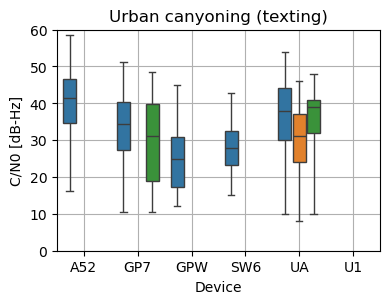

In [206]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (texting)")
 

## Swinging
NOT APPLICABLE 

## Pocket

## Comparing modes

In [207]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [208]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)

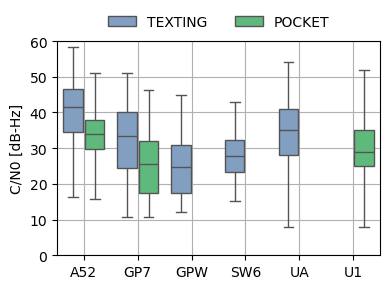

In [209]:
misc.plotBoxPlotCN0PerMode(log_dict, device_android, device_uliss, mode=['TEXTING', 'POCKET'])

#plt.title("Urban canyoning")
plt.tight_layout()
plt.savefig(f'./Figures/cn0_boxplot_mode_{survey}.png', dpi=300)

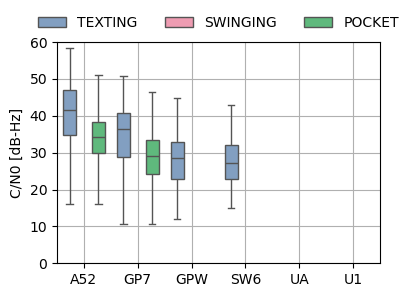

In [210]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
#plt.title("Urban canyoning")
 

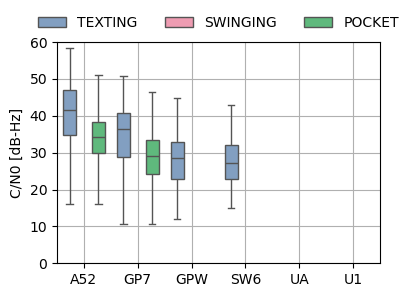

In [211]:
misc.plotBoxPlotCN0PerMode(log_dict_filtered, device_android, device_uliss)
#plt.title("Urban canyoning")
 

In [212]:
log_dict = misc.selectMode([log_android, log_mat], mode=['SWINGING', 'TEXTING', 'POCKET'])

In [213]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

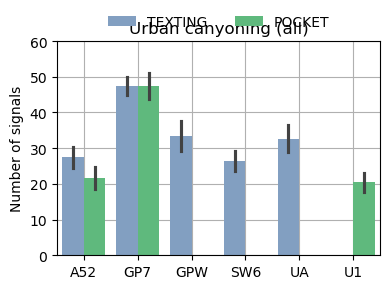

In [214]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss, mode=['TEXTING', 'POCKET'])

plt.title("Urban canyoning (all)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_all_{survey}.png', dpi=300)

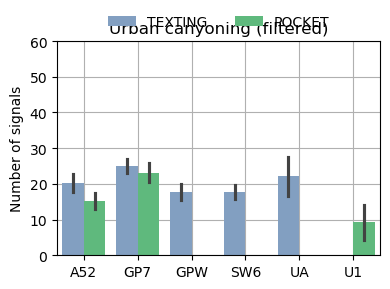

In [215]:
misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss, mode=['TEXTING', 'POCKET'])

plt.title("Urban canyoning (filtered)")
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}.png', dpi=300)

In [216]:
log_dict = misc.selectMode([log_android, log_mat_cn0], mode=['POCKET'])

Text(0.5, 1.0, 'Urban canyoning (pocket)')

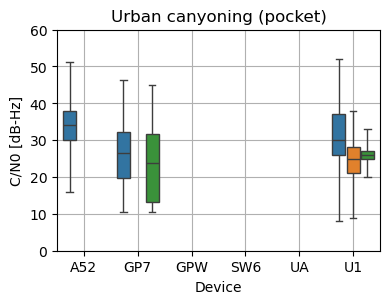

In [217]:
misc.plotBoxPlotCN0PerFrequency(log_dict, device_android, device_uliss)
plt.title("Urban canyoning (pocket)")
 

## Comparing number of satellite between modes

In [218]:
log_dict = misc.selectMode([log_android, log_mat], mode=['TEXTING', 'POCKET'])

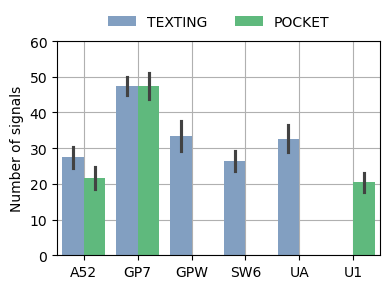

In [219]:
misc.plotBarSignalsPerMode(log_dict, device_android, device_uliss, mode=['TEXTING', 'POCKET'])

plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_all_{survey}.png', dpi=300)

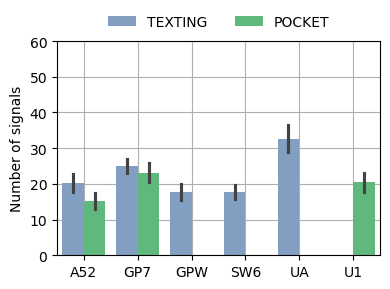

In [220]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellites(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        #log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss, mode=['TEXTING', 'POCKET'])
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_track.png', dpi=300)

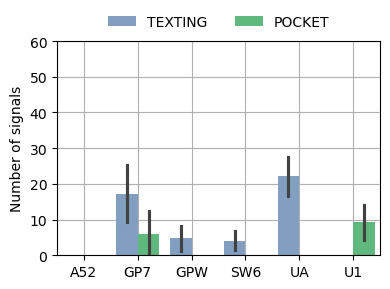

In [221]:
# Filter observations to keep only GPS, GALILEO, GLONASS valid (code lock and TOW/TOD known)
log_dict_filtered = {}
for device, log in log_dict.items():
    if device in device_android:
        log_dict_filtered[device] = misc.selectValidSatellitesPhases(log)
    if device in device_uliss:
        log_dict_filtered[device] = log.copy()
        log_dict_filtered[device]['num_sat'] = log['num_sat_valid']

misc.plotBarSignalsPerMode(log_dict_filtered, device_android, device_uliss, mode=['TEXTING', 'POCKET'])
plt.tight_layout()
plt.savefig(f'./Figures/signals_bar_mode_filtered_{survey}_phase.png', dpi=300)

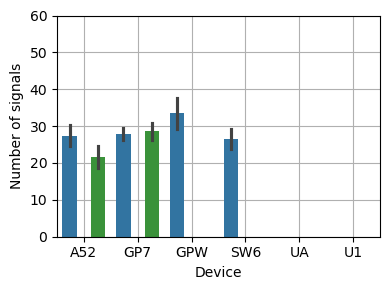

In [222]:
misc.plotBarSatellitesPerMode(log_dict, device_android, device_uliss)

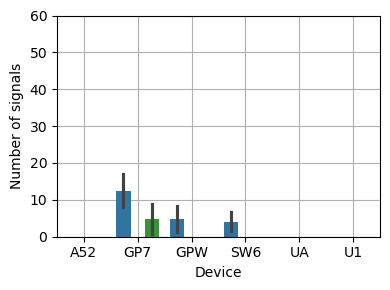

In [223]:
misc.plotBarSatellitesPerMode(log_dict_filtered, device_android, device_uliss)